# Non-linear Support Vector Machine method

n = 10
w = [ 0.02566958  0.0780341   0.03119186 -0.1597809  -0.02309605 -0.23775258
 -0.0033852   0.02248346 -0.02842173 -0.01496091]
 b = -2.6431891864587764


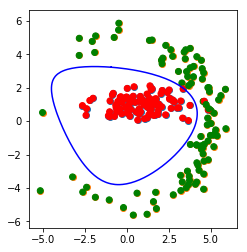

In [26]:
from scipy.optimize import minimize
import numpy as np
import itertools
import random
from math import sin, cos
import matplotlib.pyplot as plt
from skimage import measure

%matplotlib inline
plt.axes(aspect="equal")

def monomials(x, degree=1):
    m = [1.]
    for d in range(1, degree+1):
        for c in itertools.combinations_with_replacement(x, d):
            m.append(np.prod(c))
    return np.array(m)


m1 = 100
class1 = [ np.array([
    random.normalvariate(1., 1.5), random.normalvariate(1., 0.5)
]) for i in range(m1) ]

m2 = m1
angle1 = -np.pi*2/3
angle2 = np.pi*2/3
ex = np.array([1., 0.]); ey = np.array([0., 1.])
class2 = []
for i in range(m2):
    phi = random.normalvariate(0., 1.)
    r = random.normalvariate(5., 0.5)
    p = ex*cos(phi)*r + ey*sin(phi)*r
    class2.append(p.copy())
    
plt.scatter([c[0] for c in class1], [c[1] for c in class1])
plt.scatter([c[0] for c in class2], [c[1] for c in class2])

x = class1 + class2
x = np.array(x)
y = [1.]*len(class1) + [-1.]*len(class2)
y = np.array(y)
m = len(x)
perm = np.random.permutation(m)
x = x[perm]
y = y[perm]

plt.scatter(
    [c[0] for c in x], [c[1] for c in x],
    color=[ "r" if yy > 0. else "g" for yy in y ]
)

degree = 3
xext = np.array([monomials(xx, degree) for xx in x])
n = len(xext[0])
print("n =", n)
C = 10.    # Hyperparameter
w = np.array([0.]*n)
b = 0.

def hingeLoss(c):
    return max(1. - c, 0.)

def errorFunction(wb):
    w = wb[:-1]
    b = wb[-1]
    w2 = w @ w
    s = 0.
    m = len(xext)
    for i in range(m):
        c = y[i]*(w @ xext[i] - b)
        s += hingeLoss(c)
    return w2 + (C/m)*s

def classifier(p):
    pext = monomials(p, degree)
    return w @ pext - b

res = minimize(errorFunction, np.zeros(n + 1))
w = res.x[:-1]
b = res.x[-1]
print("w =", w)
print(" b =", b)

# Draw the separating line
xmin = min([xx[0] for xx in x]) - 1.
xmax = max([xx[0] for xx in x]) + 1.
# print("xmin =", xmin)
# print("xmax =", xmax)
ymin = min([xx[1] for xx in x]) - 1.
ymax = max([xx[1] for xx in x]) + 1.
# print("ymin =", xmin)
# print("ymax =", xmax)
steps = 100

def xcoord(j):
    dx = (xmax - xmin)/steps
    return xmin + j*dx
def ycoord(i):
    dy = (ymax - ymin)/steps
    return ymin + i*dy

# a is a matris of dimension (steps, steps)
a = np.array([[0.]*steps for iy in range(steps)])
for i in range(steps):
    for j in range(steps):
        xx = np.array([xcoord(j), ycoord(i)])
        a[i, j] = classifier(xx)
nullContours = measure.find_contours(a, 0.)
for c in nullContours:
    plt.plot(
        [xcoord(cc[1]) for cc in c], 
        [ycoord(cc[0]) for cc in c],
        color="blue"
    )

# Drawing Isolines

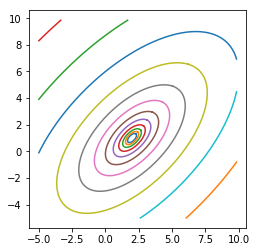

In [21]:
plt.axes(aspect="equal")
def f(x, y):
    return ((x - 2) + (y - 1))**2/4 + ((x - 2) - (y - 1))**2

xmin = -5.; xmax = 10.
ymin = -5.; ymax = 10.
m = 100; n = 100

def xcoordinate(j):
    dx = (xmax - xmin)/n
    x = xmin + j*dx
    return x

def ycoordinate(i):
    dy = (ymax - ymin)/m
    y = ymin + i*dy
    return y

a = np.array([[0.]*n for i in range(m)])
for i in range(m):
    y = ycoordinate(i)
    for j in range(n):
        x = xcoordinate(j)
        a[i, j] = f(x, y)
        
for l in range(20):
    level = 0.1*(2**l)
    contours = measure.find_contours(a, level)
    for c in contours:
        plt.plot(
            [ xcoordinate(cc[1]) for cc in c ],
            [ ycoordinate(cc[0]) for cc in c ]
            #, color="blue"
        )
    
        